In [2]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import jovian
import os
import glob
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od 
from pathlib import Path
sns.set_style('darkgrid')
import glob

<IPython.core.display.Javascript object>

In [271]:
filename = 'Explorative_analysis_Automobile_dataset'
jovian.commit(project = filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [4]:
os.getcwd()
file =os.chdir(Path.home()/Path('Desktop'))
os.listdir(file)


['20240304_123849.jpg',
 'auto.csv',
 'auto_clean.csv',
 'Black Friday Dataset.csv',
 'Country-Code (1).xlsx',
 'DAX Studio.lnk',
 'desktop.ini',
 'Microsoft Teams.lnk',
 'New folder  ruky',
 'newfoldername',
 'Opera browser.lnk',
 'test.csv',
 'V1_ CV _ Resume Template _ [Name Surname CV] - [Job Title].docx',
 'V2_ Career Change CV _ Resume Template _ [Name Surname CV] - [Job Title].docx',
 'V3_ ChatGPT CV_Resume Template.docx',
 'zomato.csv',
 '~$_ ChatGPT CV_Resume Template.docx']

In [5]:
cols=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']
     

In [7]:
df1=pd.read_csv('auto.csv', header=0, names=cols)
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
df1['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [73]:
df2=df1.copy()

In [74]:

df2['normalized-losses'].loc[df2[df2['normalized-losses']=='?'].index].count()

40

In [75]:
df_sum= df2['normalized-losses'].loc[df2[df2['normalized-losses']!='?'].index]
df_sum.median()

115.0

In [76]:
df2['normalized-losses'] =df2['normalized-losses'].str.replace('?','np.nan').fillna(df_sum.median())

In [77]:
df2['normalized-losses']= df2['normalized-losses'].str.replace('np.nan','115' )


In [78]:
df2['normalized-losses']=pd.to_numeric(df2['normalized-losses'],errors='coerce')

In [79]:
df2['price'].str.isnumeric().value_counts()

True     200
False      4
Name: price, dtype: int64

In [80]:
df2['price']=df2['price'].str.replace('?','np.nan')


In [81]:
df2['price'].loc[df2[df2['price']=='np.nan'].index]

8      np.nan
43     np.nan
44     np.nan
128    np.nan
Name: price, dtype: object

In [82]:
df2['price'].loc[df2[df2['price']!='np.nan'].index].median()

10270.0

In [83]:
df2['price']=df2['price'].str.replace('np.nan','10270')

In [84]:
df2['price']=pd.to_numeric(df2['price'],errors='coerce')

In [85]:
df2.select_dtypes(include =['float','int']).head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,115,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
1,1,115,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500


In [86]:
df2.select_dtypes(include='object').head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [87]:
df2['bore']=df2['bore'].str.replace('?','np.nan')

In [90]:
df2['bore'].loc[df2[df2['bore']!='np.nan'].index].median()

3.31

In [91]:
df2['bore']=df2['bore'].str.replace('np.nan','3.31')
df2['bore'] =pd.to_numeric(df2['bore'],errors='coerce')

In [96]:
df2['horsepower']=df2['horsepower'].str.replace('?','np.nan')
df2['horsepower'].loc[df2[df2['horsepower']!='np.nan'].index].median()
df2['horsepower']=df2['horsepower'].str.replace('np.nan','95.0')
df2['horsepower'] =pd.to_numeric(df2['horsepower'],errors='coerce')




In [101]:
df2['peak-rpm']=df2['peak-rpm'].str.replace('?','np.nan')
df2['peak-rpm'].loc[df2[df2['peak-rpm']!='np.nan'].index].median()
df2['peak-rpm']=df2['peak-rpm'].str.replace('np.nan','5200')
df2['peak-rpm'] =pd.to_numeric(df2['peak-rpm'],errors='coerce')




In [ ]:
Univariant analysis

<Axes: ylabel='Frequency'>

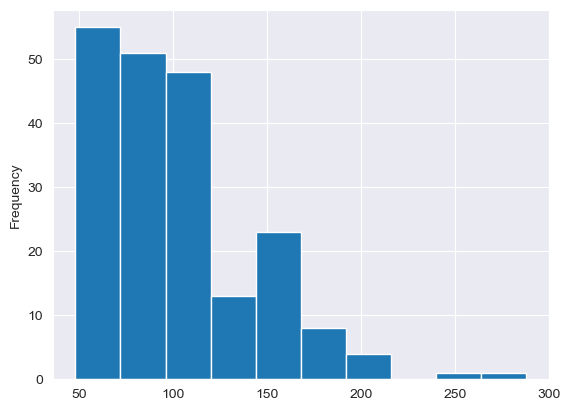

In [105]:
df2['horsepower'].plot(kind='hist')

removing the outlier from the horsepower columns

<Axes: ylabel='Frequency'>

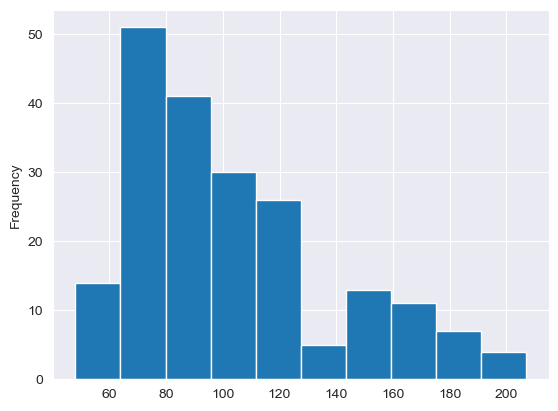

In [141]:
outlier=df2['horsepower'].mean()+3*df2['horsepower'].std()
df2['horsepower']=df2['horsepower'].loc[df2[df2['horsepower']<outlier].index]

df2['horsepower'].plot(kind='hist')

In [149]:
df3=df2.select_dtypes(include='object')

<Axes: xlabel='make'>

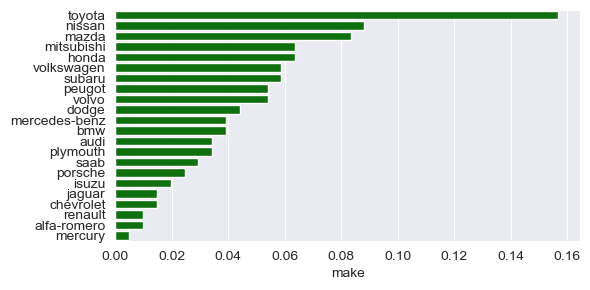

In [156]:
df3['make'].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=df3['make'].value_counts(normalize=True),y=df3['make'].value_counts().index, color ='g')

let comapred the price of the vehicle and the make to know the cost of each vehicle 

<Axes: xlabel='price', ylabel='make'>

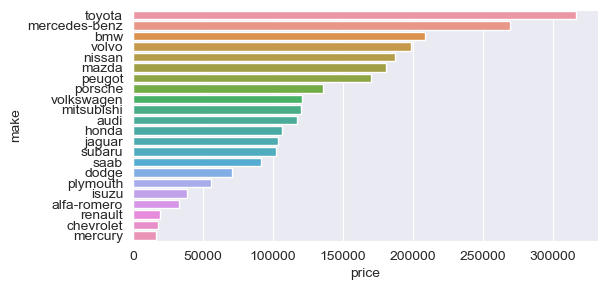

In [185]:
df2.groupby('make')['price'].sum().sort_values(ascending =False)
plt.figure(figsize=(6,3))
sns.barplot(x=df2.groupby('make')['price'].sum().sort_values(ascending =False),y=df2.groupby('make')['price'].sum().sort_values(ascending =False).index)

It appears that Toyota has the highest sales among car brands, followed by Benz, BMW, and Volvo, while Mercury has the lowest sales. This suggests that more customers are opting for Toyota cars compared to Mercury cars, based on the graph

<Axes: xlabel='fuel-type', ylabel='price'>

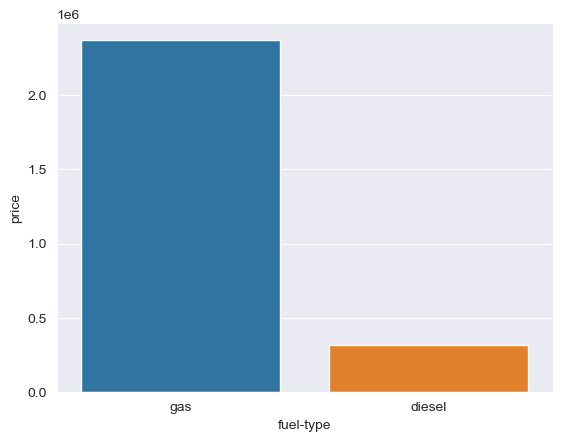

In [196]:
df2.groupby('fuel-type')['price'].sum().sort_values(ascending =False)
sns.barplot(y=df2.groupby('fuel-type')['price'].sum().sort_values(ascending =False),x= df2.groupby('fuel-type')['price'].sum().sort_values(ascending =False).index,orient='vertical')




It appears that people are purchasing more gas vehicles than diesel vehicles, which has led to an increase in the sale of gas vehicles compared to diesel. This trend may be attributed to the higher demand for gas vehicles among consumers

<Axes: ylabel='aspiration'>

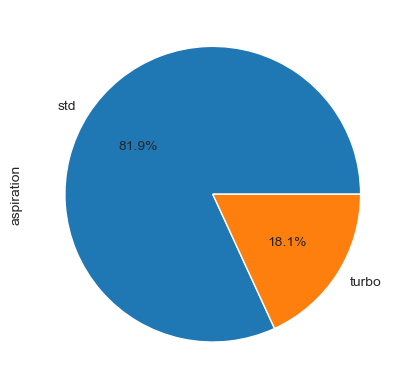

In [207]:
df2['aspiration'].value_counts().plot(kind='pie', autopct='%1.1f%%')

It appears that 81.9% of the cars do not use turbo engines, while 18.1% use turbo engines. From the graph, it's evident that customers tend to buy more cars without turbo engines than cars with turbo engines. Additionally, the sales of cars without turbo engines have increased over time compared to cars with turbo engines

Text(0.5, 1.0, 'sale of 4 door vs 2 door')

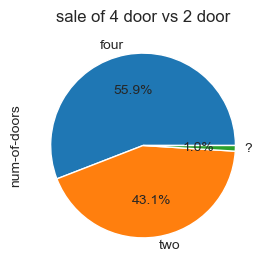

In [214]:

plt.figure(figsize=(4,3))
df2['num-of-doors'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('sale of 4 door vs 2 door')


It appears from the graph that customers prefer cars with four doors over cars with two doors. The sales of four-door cars account for 55.9% of the total sales, while two-door cars comprise 43.1% of the sales. Additionally, approximately 1% of customers did not specify their preference.

<Axes: xlabel='price', ylabel='body-style'>

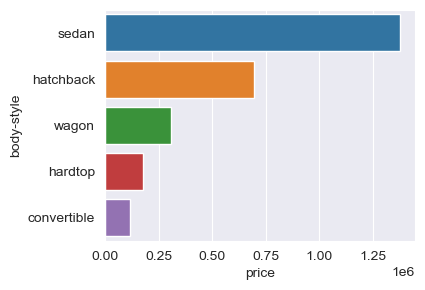

In [227]:
df2.groupby('body-style')['price'].sum().sort_values(ascending = False)
plt.figure(figsize=(4,3))
sns.barplot(x=df2.groupby('body-style')['price'].sum().sort_values(ascending = False),y= df2.groupby('body-style')['price'].sum().sort_values(ascending = False).index)


<Axes: ylabel='engine-location'>

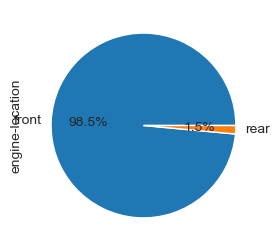

In [232]:
df2['engine-location'].value_counts()
plt.figure(figsize=(4,3))
df2['engine-location'].value_counts().plot(kind='pie', autopct='%1.1f%%')


It appears that most of the cars sold have their engines at the front. According to the graph, approximately 98% of the total car volume consists of cars with a front engine, compared to cars with engines at the rear

<Axes: ylabel='Frequency'>

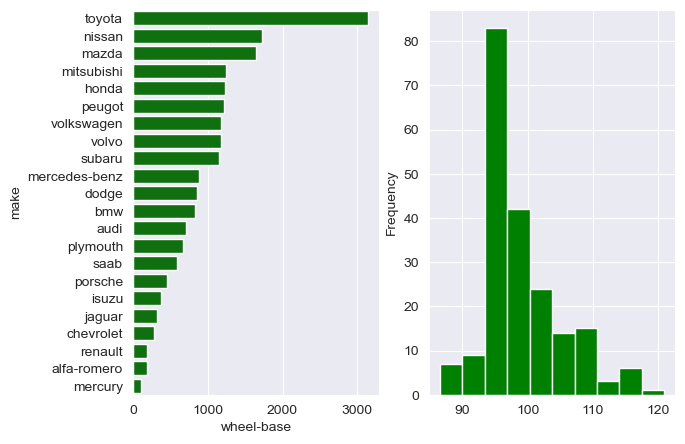

In [255]:

fig,ax=plt.subplots(1,2,figsize=(7,5))
df2.groupby('make')['wheel-base'].sum().sort_values(ascending=False)
sns.barplot(x=df2.groupby('make')['wheel-base'].sum().sort_values(ascending=False),y=df2.groupby('make')['wheel-base'].sum().sort_values(ascending=False).index, color='g', ax=ax[0])
df2['wheel-base'].plot(kind='hist',color='g' )


A higher percentage of cars with a wheelbase between 95-100 have more sales compared to cars with a lower wheelbase, such as 115-120. It appears that Toyota tops the list of cars meeting this criterion, likely due to the high demand for Toyota vehicles. Following Toyota, Nissan and Mazda also show substantial sales, while Mitsubishi and Honda maintain reasonable sales figures. However, Mercury ranks lower on the list. Therefore, we can conclude that the high demand for Toyota is likely attributed to its higher wheelbase compared to other cars

<Axes: title={'center': 'engine size distribution '}, ylabel='Frequency'>

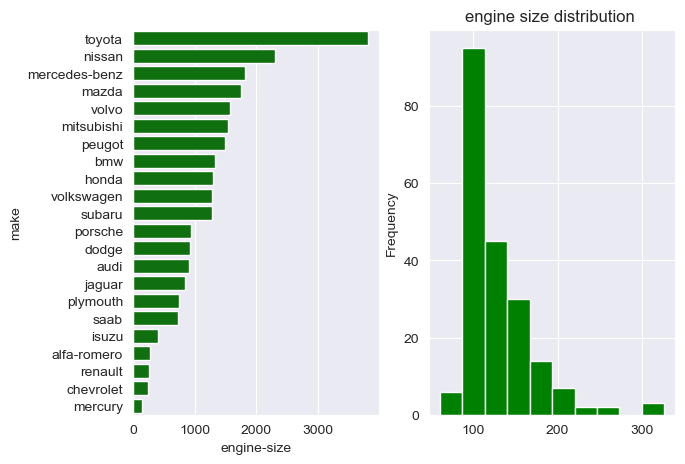

In [256]:
fig,ax=plt.subplots(1,2,figsize=(7,5))

df2.groupby('make')['engine-size'].sum().sort_values(ascending=False)
sns.barplot(x=df2.groupby('make')['engine-size'].sum().sort_values(ascending=False),y=df2.groupby('make')['engine-size'].sum().sort_values(ascending=False).index, color='g', ax=ax[0])
df2['engine-size'].plot(kind='hist', color='g', title =( 'engine size distribution '))

<Axes: title={'center': 'bore distribution '}, ylabel='Frequency'>

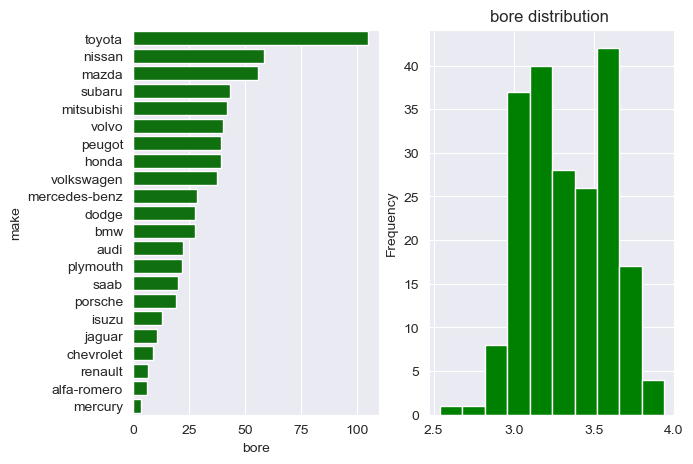

In [258]:
fig,ax=plt.subplots(1,2,figsize=(7,5))

df2.groupby('make')['bore'].sum().sort_values(ascending=False)
sns.barplot(x=df2.groupby('make')['bore'].sum().sort_values(ascending=False),y=df2.groupby('make')['bore'].sum().sort_values(ascending=False).index, color='g', ax=ax[0])
df2['bore'].plot(kind='hist', color='g', title =( 'bore distribution '))

It appears that cars with a higher bore diameter between 3-3.5 inches make more sales. Additionally, there is an increase in sales of cars with a bore diameter greater than 3.5 inches. From the diagram, we also notice an increase in the sale of cars with a bore diameter greater than 3.5 inches. In terms of car category, Toyota seems to top the list of car sales, indicating that most Toyota cars have a bore diameter of 3-3.5 inches. This likely contributes to the increased sale of Toyota cars. Following Toyota, other car manufacturers such as Nissan, Mazda, Mitsubishi, and Volvo also fall into this category, collectively accounting for approximately 50% of total sales.

<Axes: title={'center': 'compression-ratio '}, ylabel='Frequency'>

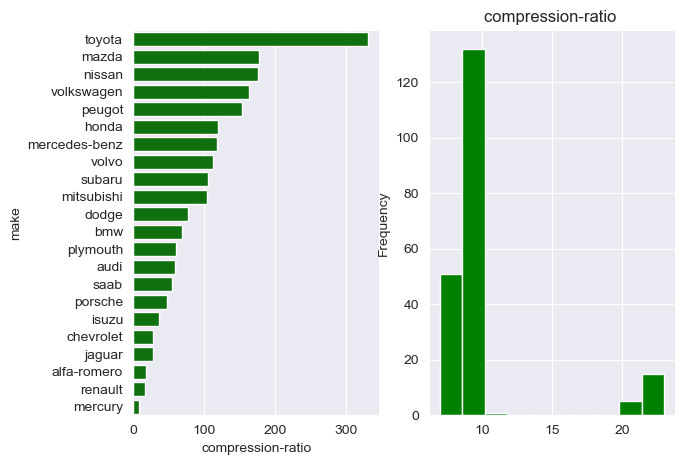

In [261]:
fig,ax=plt.subplots(1,2,figsize=(7,5))

df2.groupby('make')['compression-ratio'].sum().sort_values(ascending=False)
sns.barplot(x=df2.groupby('make')['compression-ratio'].sum().sort_values(ascending=False),y=df2.groupby('make')['compression-ratio'].sum().sort_values(ascending=False).index, color='g', ax=ax[0])
df2['compression-ratio'].plot(kind='hist', color='g', title =( 'compression-ratio '))


Toyota, Nissan, and Mazda top the list of cars with a high compression ratio and a large bore diameter. Conversely, some cars with a high or large bore diameter, such as Subaru, Volvo, and Mitsubishi, drop in the list of compression ratio rankings. This suggests that these cars have a high bore diameter but a lower compression ratio. Most of the cars at the top of the list have a compression ratio of 10 or more.

<Axes: title={'center': 'horsepower'}, ylabel='Frequency'>

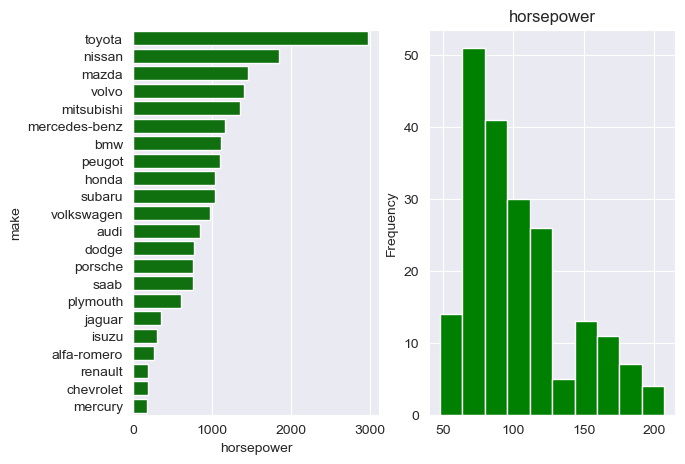

In [265]:
fig,ax=plt.subplots(1,2,figsize=(7,5))

df2.groupby('make')['horsepower'].sum().sort_values(ascending=False)
sns.barplot(x=df2.groupby('make')['horsepower'].sum().sort_values(ascending=False),y=df2.groupby('make')['horsepower'].sum().sort_values(ascending=False).index, color='g', ax=ax[0])
df2['horsepower'].plot(kind='hist', color='g', title =( 'horsepower'))


Toyota, Nissan, and Mazda lead the list of cars with high horsepower, large bore diameter, and compression ratio. Volvo and Mitsubishi also exhibit good horsepower performance, while Subaru drops down the list due to lower horsepower. Meanwhile, Volkswagen and Mercury still remain at the bottom of the table in terms of these performance metrics

In [269]:
jovian.commit(filename = filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"



Based on the analysis conducted in this project, several key findings have emerged regarding the characteristics and sales trends of cars. Here is a comprehensive conclusion:

 The analysis reveals notable trends in car sales based on various attributes such as bore diameter, compression ratio, and horsepower. Toyota, Nissan, and Mazda emerge as top performers in terms of sales, particularly in cars with high horsepower, large bore diameter, and compression ratio.

 Cars with higher horsepower, larger bore diameter, and compression ratio tend to perform better in terms of sales. Volvo and Mitsubishi also demonstrate competitive performance in these aspects, while Subaru shows comparatively lower horsepower.

 The influence of brand reputation and consumer preferences is evident in the sales trends observed. Brands like Toyota, Nissan, and Mazda command a strong market presence, indicating a positive perception among consumers for their performance attributes.

 The analysis underscores the importance of specific attributes such as bore diameter, compression ratio, and horsepower in driving consumer purchasing decisions. Cars with higher values in these attributes tend to attract more buyers, leading to increased sales.

 The competitive landscape of the automotive market is dynamic, with brands continuously striving to enhance their offerings to meet consumer demands. Understanding and leveraging key performance metrics are critical for maintaining competitiveness and driving sales growth
 
 The make of a car, such as Toyota, Nissan, or Mazda, carries significant brand reputation and reliability. Consumers often have brand preferences based on factors like reliability, performance, and overall reputation, influencing their purchasing decisions.

 The type of fuel a car uses, whether gasoline or diesel, can impact consumer choice based on factors like fuel efficiency, environmental concerns, and availability of fueling stations.

 Cars may be equipped with either naturally aspirated or turbocharged engines. Turbocharged engines offer higher performance but may come at a higher cost, influencing consumer preferences and sales.

 The body style of a car, including the number of doors, can affect its appeal to different consumer demographics. For example, families may prefer four-door sedans for practicality, while sports car enthusiasts may prefer two-door coupes for their sporty look and feel.

## References and Future Work



- kaggle website https://www.kaggle.com/datasets/toramky/automobile-dataset/data
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

